In [86]:
import os
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

In [108]:
df = pd.read_csv ('final_data(2).csv')
df = df.dropna()
df_HH = df[['height', 'grain_size', 'density', 'temperature', 'HH']]
df_HV = df[['height', 'grain_size', 'density', 'temperature', 'HV']]
df_VH = df[['height', 'grain_size', 'density', 'temperature', 'VH']]
df_VV = df[['height', 'grain_size', 'density', 'temperature', 'VV']]

In [109]:
train_dataset_HH = df_HH.sample(frac=0.8, random_state=0)
test_dataset_HH = df_HH.drop(train_dataset_HH.index)

train_dataset_HV = df_HV.sample(frac=0.8, random_state=0)
test_dataset_HV = df_HV.drop(train_dataset_HV.index)

train_dataset_VH = df_VH.sample(frac=0.8, random_state=0)
test_dataset_VH = df_VH.drop(train_dataset_VH.index)

train_dataset_VV = df_VV.sample(frac=0.8, random_state=0)
test_dataset_VV = df_VV.drop(train_dataset_VV.index)

In [111]:
scaler = MinMaxScaler()
train_x_HH = scaler.fit_transform(train_dataset_HH.drop(columns=['HH']))
train_y_HH = train_dataset_HH['HH']
test_x_HH = scaler.transform(test_dataset_HH.drop(columns=['HH']))
test_y_HH = test_dataset_HH['HH']

train_x_HV = scaler.fit_transform(train_dataset_HV.drop(columns=['HV']))
train_y_HV = train_dataset_HV['HV']
test_x_HV = scaler.transform(test_dataset_HV.drop(columns=['HV']))
test_y_HV = test_dataset_HV['HV']

train_x_VH = scaler.fit_transform(train_dataset_VH.drop(columns=['VH']))
train_y_VH = train_dataset_VH['VH']
test_x_VH = scaler.transform(test_dataset_VH.drop(columns=['VH']))
test_y_VH = test_dataset_VH['VH']

train_x_VV = scaler.fit_transform(train_dataset_VV.drop(columns=['VV']))
train_y_VV = train_dataset_VV['VV']
test_x_VV = scaler.transform(test_dataset_VV.drop(columns=['VV']))
test_y_VV = test_dataset_VV['VV']

In [134]:
rf = RandomForestRegressor(n_estimators=2, max_depth=5,random_state=0)
rf.fit(train_x_HH, train_y_HH)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=0)

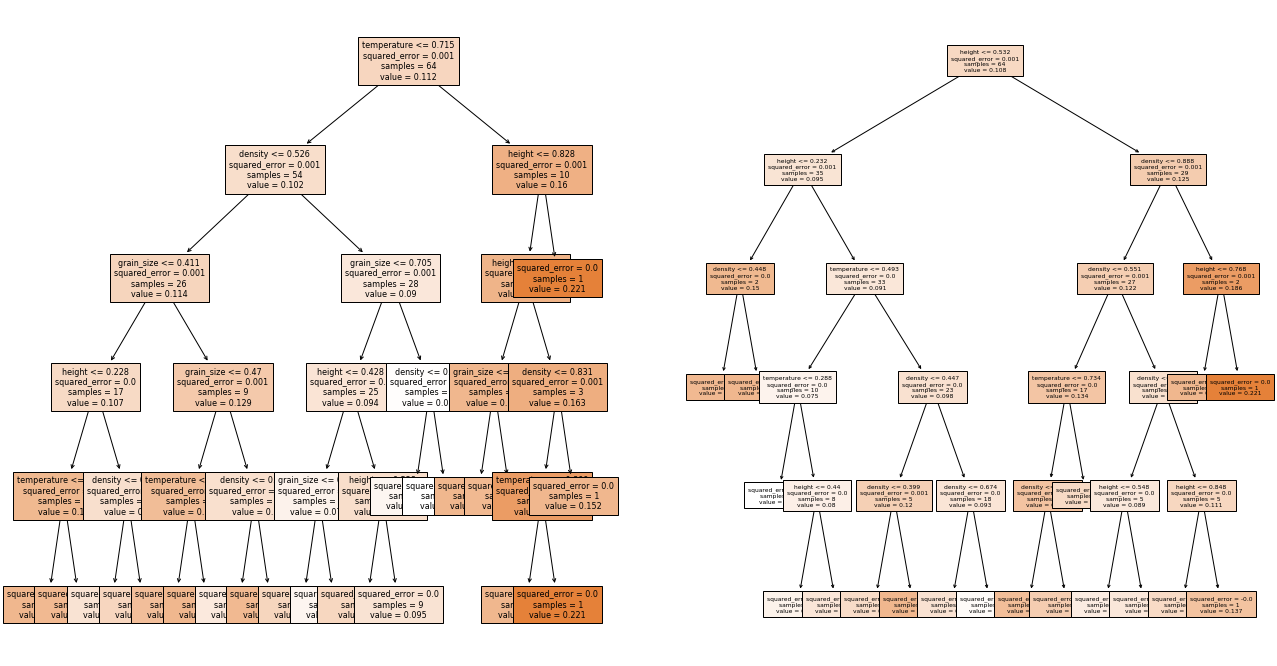

In [135]:
features = list((train_dataset_HH.columns[:-1]))

plt.figure(figsize = (22, 12))

plt.subplot(121)
plot_tree(rf.estimators_[0], 
          filled = True, 
          fontsize = 8, 
         feature_names= features)

plt.subplot(122)
plot_tree(rf.estimators_[1], 
          filled = True, 
          fontsize = 6, 
         feature_names= features)

plt.show()

In [136]:
pred = rf.predict(test_x_HH)
error = mean_squared_error(test_y_HH, pred, squared=False)
print(error)

0.024159578728905444


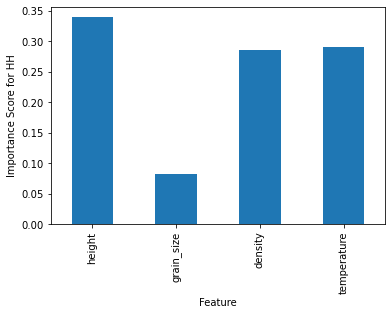

In [137]:
feature_impotanceRF = pd.Series(rf.feature_importances_, index=features)
feature_impotanceRF.plot(kind = 'bar')
plt.xlabel('Feature')
plt.ylabel('Importance Score for HH')
plt.show()

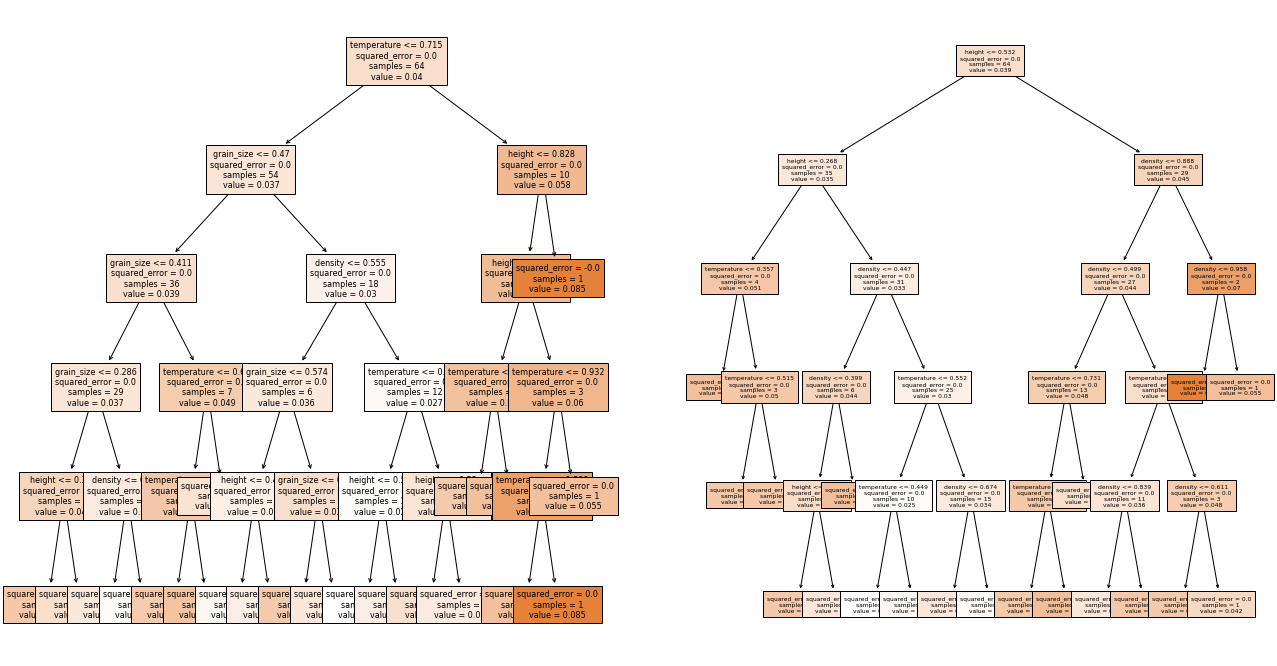

In [138]:
rf = RandomForestRegressor(n_estimators=2, max_depth=5,random_state=0)
rf.fit(train_x_HV, train_y_HV)

features = list((train_dataset_HV.columns[:-1]))

plt.figure(figsize = (22, 12))

plt.subplot(121)
plot_tree(rf.estimators_[0], 
          filled = True, 
          fontsize = 8, 
         feature_names= features)

plt.subplot(122)
plot_tree(rf.estimators_[1], 
          filled = True, 
          fontsize = 6, 
         feature_names= features)

plt.show()

In [139]:
pred = rf.predict(test_x_HV)
error = mean_squared_error(test_y_HV, pred, squared=False)
print(error)

0.00781253836665099


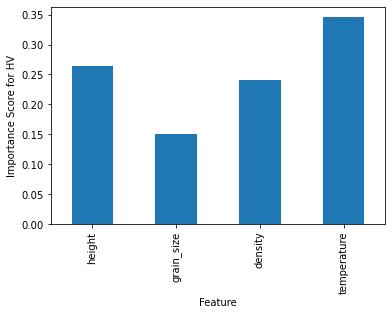

In [140]:
feature_impotanceRF = pd.Series(rf.feature_importances_, index=features)
feature_impotanceRF.plot(kind = 'bar')
plt.xlabel('Feature')
plt.ylabel('Importance Score for HV')
plt.show()

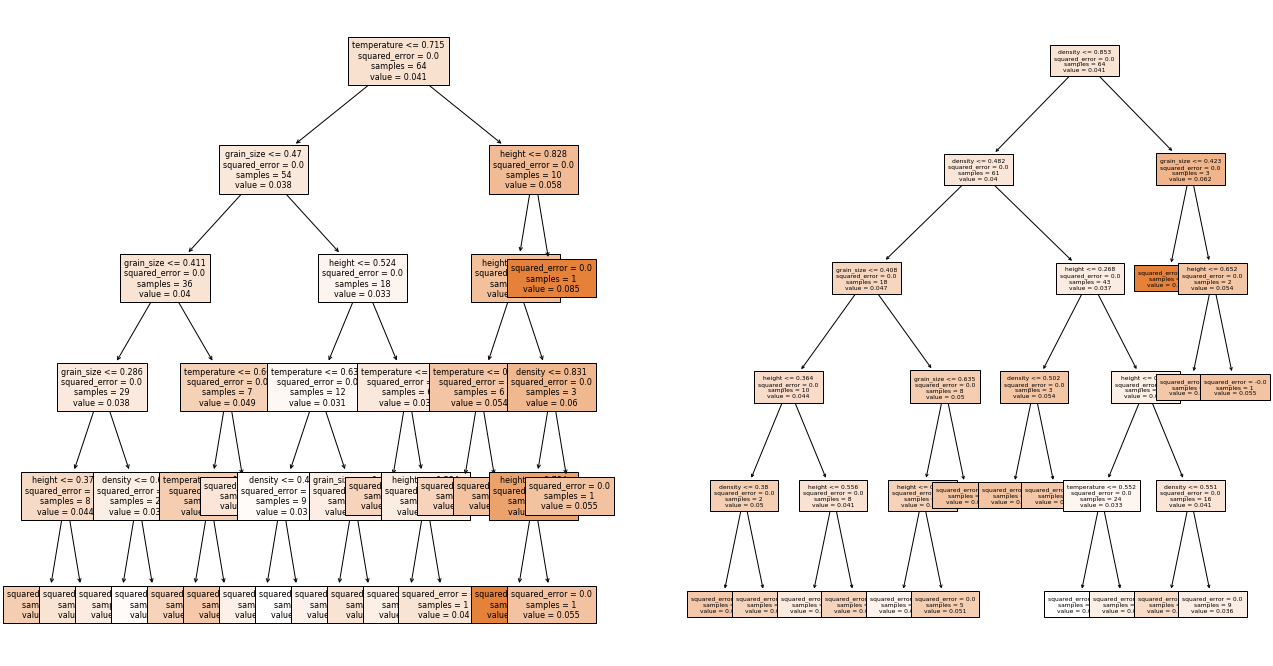

In [141]:
rf = RandomForestRegressor(n_estimators=2, max_depth=5,random_state=0)
rf.fit(train_x_VH, train_y_VH)

features = list((train_dataset_VH.columns[:-1]))

plt.figure(figsize = (22, 12))

plt.subplot(121)
plot_tree(rf.estimators_[0], 
          filled = True, 
          fontsize = 8, 
         feature_names= features)

plt.subplot(122)
plot_tree(rf.estimators_[1], 
          filled = True, 
          fontsize = 6, 
         feature_names= features)

plt.show()

In [142]:
pred = rf.predict(test_x_VH)
error = mean_squared_error(test_y_VH, pred, squared=False)
print(error)

0.00880096976376925


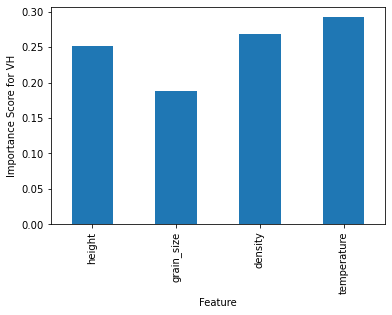

In [143]:
feature_impotanceRF = pd.Series(rf.feature_importances_, index=features)
feature_impotanceRF.plot(kind = 'bar')
plt.xlabel('Feature')
plt.ylabel('Importance Score for VH')
plt.show()

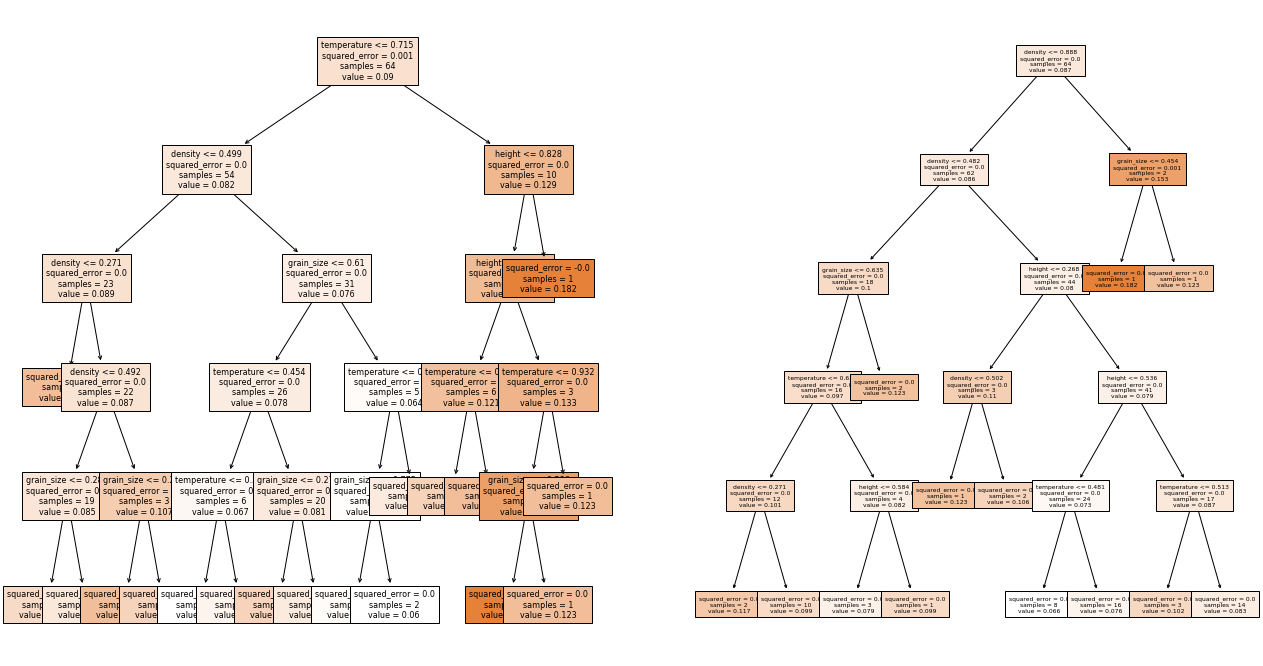

In [144]:
rf = RandomForestRegressor(n_estimators=2, max_depth=5,random_state=0)
rf.fit(train_x_VV, train_y_VV)

features = list((train_dataset_VV.columns[:-1]))

plt.figure(figsize = (22, 12))

plt.subplot(121)
plot_tree(rf.estimators_[0], 
          filled = True, 
          fontsize = 8, 
         feature_names= features)

plt.subplot(122)
plot_tree(rf.estimators_[1], 
          filled = True, 
          fontsize = 6, 
         feature_names= features)

plt.show()

In [145]:
pred = rf.predict(test_x_VV)
error = mean_squared_error(test_y_VV, pred, squared=False)
print(error)

0.017536840745013226


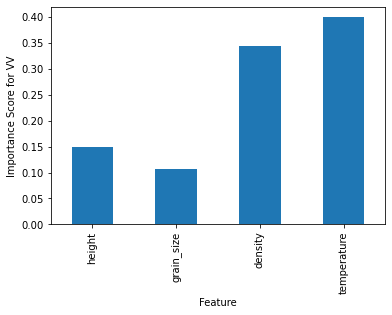

In [146]:
feature_impotanceRF = pd.Series(rf.feature_importances_, index=features)
feature_impotanceRF.plot(kind = 'bar')
plt.xlabel('Feature')
plt.ylabel('Importance Score for VV')
plt.show()